<a href="https://colab.research.google.com/github/premswaroopmusti/Handwritten-Digits-Classification-using-Keras/blob/main/Handwritten_Digits_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [132]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [133]:
len(x_train)

60000

In [134]:
len(x_test)

10000

In [135]:
x_train[0].shape

(28, 28)

In [136]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

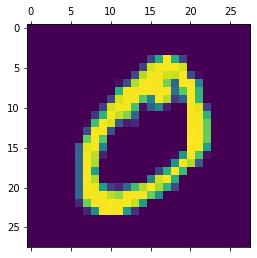

In [137]:
plt.matshow(x_train[1])

In [138]:
y_train[1]

0

In [139]:
y_train[0:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

now we are going to flatten our training & testing dataset

because we want to convert this 28x28 image into a single dimensional array that will have 784 elements 

In [140]:
x_train.shape

(60000, 28, 28)

In [141]:
# often in machine learing we should scale our values, we can see in our x_train that each value is in the range 0 to 255
# if we divide the whole array with 255 , it will be scaled from 0 to 1
# bcz scaling is a technique which improves accuracy of machine learning model
x_train = x_train/255
x_test = x_test/255

In [142]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [143]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)



In [144]:
x_train_flattened.shape

(60000, 784)

In [145]:
x_test_flattened.shape

(10000, 784)

In [146]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

let's create a simple neural network

it will have just 2 layers

input layer with 784 elements

output layer with 10 elements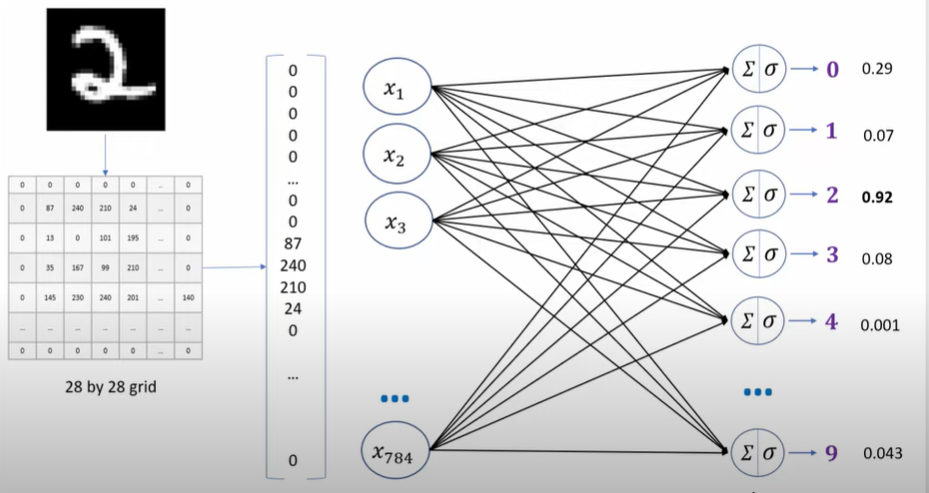

optimizer allow u to train the model efficiently, when backward propagation and training is going on  optimizer will allow u to reach to global optima in efficient way

In [147]:
model = keras.Sequential([                   # sequential means we are having a stack of layers in our neural netowork, and since it is a stack it will accept every layer as one element
                  keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')                                            # keras has this api keras.layers.Dense
])                                                                              # Dense means all the neurons in 1st layer are connected with every other neuron in the 2nd layer
                                                                                # so we have created a dense layer here
model.compile(optimizer = 'adam',                                               # we have to compile the neural network and we pass bunch of arguments
              loss = 'sparse_categorical_crossentropy',                        
               metrics = ['accuracy']                                           # metrics is accuracy bcz our goal is to make it more accuracte 
              )        
model.fit(x_train_flattened,y_train,epochs = 10) 
# fit is where the actual training happens, we will supply the training set basically, y_train is not flattened bcz it's a simple array
# epochs is like number of iterations for which our neural netowork is run the training
# sparse_categorical_crossentropy means our output class are categorical, bcz we have categories basically 0 to 9, we have 10 classes in our output

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8775
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

accuracy of 1.0 would be perofect
but accuracy should be around 0.97 i.e 97%

then we can say that our model has good accuracy

In [149]:
# let's try to evaluate the accuracy on test dataset
# before deploying model to production we should always evaluate the accuracy on a test dataset 
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2628 - accuracy: 0.9277


[0.262790709733963, 0.9276999831199646]

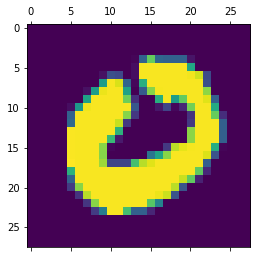

In [150]:
plt.matshow(x_test[25])

In [151]:
y_predicted = model.predict(x_test_flattened)
y_predicted[25]

array([9.9998295e-01, 1.1165964e-18, 1.9504428e-03, 5.1989776e-08,
       2.1062851e-05, 2.4517435e-01, 8.2604402e-01, 1.2968466e-07,
       9.0396404e-03, 5.8311875e-06], dtype=float32)

In [152]:
np.argmax(y_predicted[25])

0

In [153]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [154]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [155]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    7,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    8,  944,   14,    8,    3,   12,    9,   27,    3],
       [   2,    0,   19,  922,    0,   29,    2,   11,   19,    6],
       [   1,    2,    8,    2,  912,    0,    9,    6,    9,   33],
       [   7,    2,    2,   31,    6,  798,   12,    4,   26,    4],
       [  12,    3,    8,    1,    7,   21,  903,    1,    2,    0],
       [   1,    7,   24,    5,    7,    1,    0,  950,    2,   31],
       [   8,   13,    7,   24,    9,   37,    9,   11,  850,    6],
       [  11,    8,    1,   10,   24,    9,    0,   22,    4,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

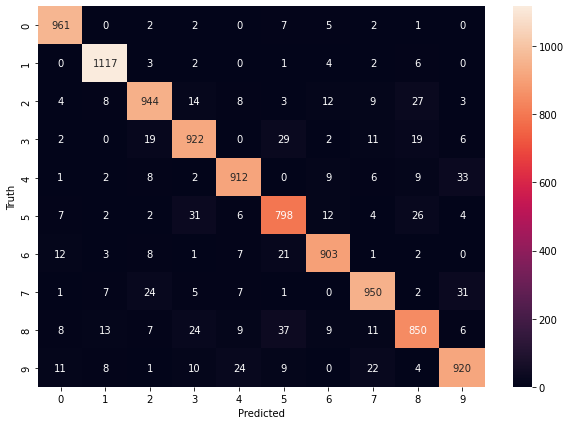

In [156]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [158]:
# let's add a hidden layer, it tends to imporve the peroformance
model = keras.Sequential([             
                  keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),  
                  keras.layers.Dense(10,activation = 'sigmoid')                                           
])                                                                              
                                                                                
model.compile(optimizer = 'adam',                                               
              loss = 'sparse_categorical_crossentropy',                        
               metrics = ['accuracy']                                            
              )        
model.fit(x_train_flattened,y_train,epochs = 10) 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1205 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

In [160]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9770


[0.07762036472558975, 0.9769999980926514]

Text(69.0, 0.5, 'Truth')

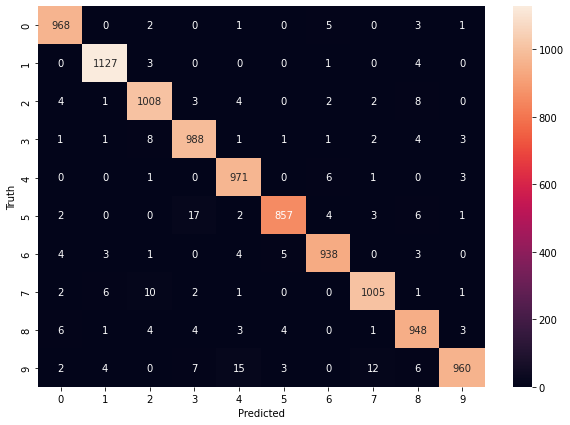

In [162]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')